# 4.10 CODING ETIQUETTE & EXCEL REPORTING
** **

Goal will be to provide better insight for customer profiling in terms of ads, bonus programs, and sales information.

**SCRIPT CONTENTS:**

1. Importing Libraries & Files
2. Security Implications
3. Customer Behavior
    - Region Segmentation
    - Spending Habits
4. Exclusion Flags of Customer Activity
    - Low Activity Customer List **(Low Activity Customers.pkl)**
    - High Activity Customer List **(High Activity Customers.pkl)**
5. Customer Profiling
   - Age
   - Income
   - Pet Owner
   - Number of Depenands 
6. Customer Profile Visualization Charts
7. Aggregate (mean, min & max) of Customer Profiles
8. Comparison of Customer Profiles with Regions and Departments
9. Visualizations of results & Exporting Updated DataFrames

** **
#### 1. IMPORTING LIBRARIES & FILES

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'/Users/sina/Desktop/12-2022 Instacart Basket Analysis'

In [3]:
# importing Recent Merged File (order, products & customer DataFrames)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

** **
#### 2. SECURITY IMPLICATIONS

**Q2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.**

In [4]:
# Checking DataFrame Data Types
df.dtypes

order_id                            int64
user_id                             int64
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                          int64
add_to_cart_order                   int64
reordered                           int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
price_range_loc                    object
busiest_day                        object
busiest_days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
avg_price                         float64
spender_flag                       object
median_days_since_prior_order     float64
frequency_flag                     object
first_name                        

In [5]:
# Checking Merged File DataFrame Output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,registration_date,number_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


**NOTE: PERSONAL IDENTIFIABLE INFORMATION (PII) DATA SECURITY**

_The DataFrame above includes data points that may expose customer personal information like Names (including Surnames), this can be handled in 3 ways:_

1. Eliminate (or drop) columns with Names data entries.
2. Filter out columns with Names.
3. Maintain data points but provided notes to management team as we all to the stakeholders regarding this information.
 
_**For this case, columns with names will be dropped in complaince to customer privacy.**_

In [6]:
# Dropping columns Name and Surname. Check Output.
df2 = df.drop(columns = ['first_name', 'surname'])

In [7]:
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,registration_date,number_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,103.20339,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,103.20339,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,103.20339,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,103.20339,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,103.20339,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


**UPDATE** is successful. first_name and surname columns have beem removed.

****
#### 3. CUSTOMER BEHAVIOR

**Q3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.**

In [8]:
# Checking US frequency
df2['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
# Creating Region list
Region = []

for value in df2 ['state']:
 if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    Region.append('North East')
 elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    Region.append('Midwest')
 elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    Region.append('South')
 else:
    Region.append('West')

In [10]:
# Creating the region column 
df2['region'] = Region

In [11]:
# Checking the df for the new region column
df2.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,registration_date,number_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [12]:
#Checking the data type of the new column
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  price_range_loc                object  
 14  busiest_day                    object  
 15  busiest_days                   object  
 16  busiest_period_of_day          object  
 17  max_order                

**- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)**

In [13]:
# Crossing spending_flag and region
spending_habits = pd.crosstab(df2['region'], df2['spender_flag'], dropna = False)

In [14]:
spending_habits

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
North East,108225,5614511
South,209691,10582194
West,160354,8132559


What we can see from the crosstab is that the High Spenders in the South are the ones contributing the most in the total revenue. They are followed by West, Midwest and the North East. 

In [48]:
# Copying crosstab to clipboard
spending_habits.to_clipboard()

** **
#### 4. EXCLUSION FLAGS FOR CUSTOMER ACTIVITY

**Q4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.**

In [15]:
# Creating activity flag using the max_order column to set our criteria
df2.loc[df2['max_order']<5, 'activity_flag'] = 'low_activity_customer'
df2.loc[df2['max_order']>=5, 'activity_flag'] = 'normal_activity_customer'

In [16]:
# Checking the df
df2.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,registration_date,number_dependants,marital_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer


In [17]:
# Checking the amount of low and normal activity customers
df2['activity_flag'].value_counts(dropna=False)

normal_activity_customer    30964564
low_activity_customer        1440295
Name: activity_flag, dtype: int64

In [18]:
# Creating a subset for the low activity customers  
low_activity_custs = df2[df2['activity_flag'] == 'low_activity_customer']

In [19]:
# Checking the subset
low_activity_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,registration_date,number_dependants,marital_status,income,_merge,region,activity_flag
1510,520620,120,1,3,11,999.0,196,2,0,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity_customer
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity_customer
1512,520620,120,1,3,11,999.0,46149,1,0,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity_customer
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity_customer
1514,520620,120,1,3,11,999.0,26348,3,0,Mixed Fruit Fruit Snacks,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low_activity_customer


In [20]:
# Checking the subset size
low_activity_custs.shape

(1440295, 33)

In [21]:
# Exporting the subset
low_activity_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_act_custs.pkl'))

In [22]:
# Creating a subset for the normal activity customers
ords_prods_custs_normal = df2[df2['activity_flag'] == 'normal_activity_customer']

In [23]:
# Checking the subset
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,registration_date,number_dependants,marital_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer


In [24]:
# Checking the subset's size
ords_prods_custs_normal.shape

(30964564, 33)

In [25]:
# Checking the subset's columns
ords_prods_custs_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  price_range_loc                object  
 14  busiest_day                    object  
 15  busiest_days                   object  
 16  busiest_period_of_day          object  
 17  max_order                

In [26]:
# Counting the values left on the new subset
ords_prods_custs_normal['activity_flag'].value_counts(dropna = False)

normal_activity_customer    30964564
Name: activity_flag, dtype: int64

In [27]:
# Exporting Normal Activity Customers DataFrame
ords_prods_custs_normal.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','normal_act_custs.pkl'))

****
#### 5. . CUSTOMER PROFILING

**Age Profiling**

For the age profiling, I will use three categories:

18-35 = Young

36-60 = Middle aged

over 60 = Senior

In [28]:
# Creating the age group flag
ords_prods_custs_normal.loc[(ords_prods_custs_normal['age']>=18)&(ords_prods_custs_normal['age']<=35),'age_group_flag']='Young'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['age']>=36)&(ords_prods_custs_normal['age']<=60),'age_group_flag']='Middle aged'
ords_prods_custs_normal.loc[ords_prods_custs_normal['age']>60,'age_group_flag']='Senior'

/var/folders/bx/pgf8ksn96xd_3nc77ydj3_0c0000gp/T/ipykernel_9085/1269580017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[(ords_prods_custs_normal['age']>=18)&(ords_prods_custs_normal['age']<=35),'age_group_flag']='Young'


In [29]:
# Checking the df
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,registration_date,number_dependants,marital_status,income,_merge,region,activity_flag,age_group_flag
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young


In [30]:
# Checking the df
ords_prods_custs_normal['age_group_flag'].value_counts(dropna=False)

Middle aged    12113152
Senior         10112607
Young           8738805
Name: age_group_flag, dtype: int64

**Income Profiling**

For the income profiling I will use three categories:

below 30000 = Low income

30000-100000 = Middle income

over 100000 = High Income

In [31]:
# Creating the income flag
ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']<=30000),'income_flag']='Low income'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']>30000)&(ords_prods_custs_normal['income']<=100000),'income_flag']='Middle income'
ords_prods_custs_normal.loc[ords_prods_custs_normal['income']>100000,'income_flag']='High income'

/var/folders/bx/pgf8ksn96xd_3nc77ydj3_0c0000gp/T/ipykernel_9085/1268314205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']<=30000),'income_flag']='Low income'


In [32]:
# Checking the df
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,registration_date,number_dependants,marital_status,income,_merge,region,activity_flag,age_group_flag,income_flag
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income


In [33]:
# Checking the df
ords_prods_custs_normal['income_flag'].value_counts(dropna=False)

Middle income    16563404
High income      14207028
Low income         194132
Name: income_flag, dtype: int64

**Pet Owner Status**

If a family is buying from department_id=8 (pets), then pet_owner

If a family isn't buying from department_id=8 (pets), no pet_owner

In [34]:
# Creating column for Pet_Owner STATUS  in refernce to department_id 8 (pets) and Check Output

ords_prods_custs_normal.loc[(ords_prods_custs_normal['department_id'] == 8), 'pet_owner'] = 'Yes'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['department_id'] != 8), 'pet_owner'] = 'No'

/var/folders/bx/pgf8ksn96xd_3nc77ydj3_0c0000gp/T/ipykernel_9085/3077974890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[(ords_prods_custs_normal['department_id'] == 8), 'pet_owner'] = 'Yes'


In [35]:
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,registration_date,number_dependants,marital_status,income,_merge,region,activity_flag,age_group_flag,income_flag,pet_owner
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,normal_activity_customer,Young,Middle income,No


In [36]:
# Checking the df
ords_prods_custs_normal['pet_owner'].value_counts(dropna=False)

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

In [37]:
# Checking Pet_Owner Dimension
ords_prods_custs_normal['pet_owner'].shape

(30964564,)

**Number of Depenands Profiling**

For the number of depenands profiling I will use three categories:

0 depenands = Small household

1-2 depenands = Medium household

more than 3 depenands = Big Household

In [38]:
# Creating the household flag
ords_prods_custs_normal.loc[ords_prods_custs_normal['number_dependants'] <= 0 ,'household_flag']='Small household'
ords_prods_custs_normal.loc[(ords_prods_custs_normal['number_dependants'] >= 1) & (ords_prods_custs_normal['number_dependants'] <= 2),'household_flag']='Medium household'
ords_prods_custs_normal.loc[ords_prods_custs_normal['number_dependants']>=3,'household_flag']='Big household'

/var/folders/bx/pgf8ksn96xd_3nc77ydj3_0c0000gp/T/ipykernel_9085/1882243107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[ords_prods_custs_normal['number_dependants'] <= 0 ,'household_flag']='Small household'


In [39]:
# Checking the df
ords_prods_custs_normal.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_dependants,marital_status,income,_merge,region,activity_flag,age_group_flag,income_flag,pet_owner,household_flag
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,3,married,40423,both,South,normal_activity_customer,Young,Middle income,No,Big household


In [40]:
# Checking the df
ords_prods_custs_normal['household_flag'].value_counts(dropna=False)

Medium household    15452367
Big household        7772516
Small household      7739681
Name: household_flag, dtype: int64

In [41]:
ords_prods_custs_normal.shape

(30964564, 37)

****
#### 6. CUSTOMER PROFILE VISUALIZATION CHARTS

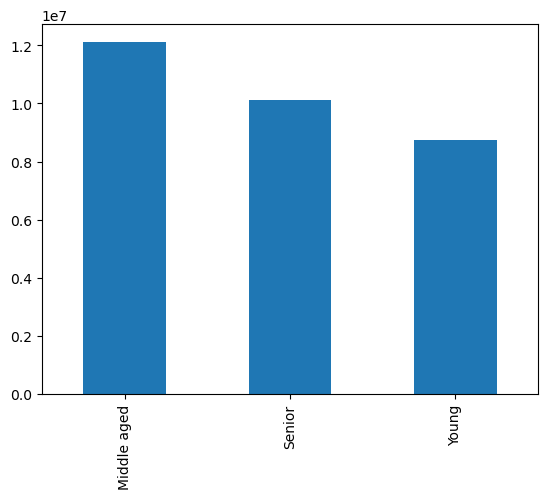

In [42]:
# Create a Bar Chart for Age
br_age_ctgry = ords_prods_custs_normal['age_group_flag'].value_counts().plot.bar()

In [46]:
br_age_ctgry.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group_flag_1.png'),bbox_inches='tight')

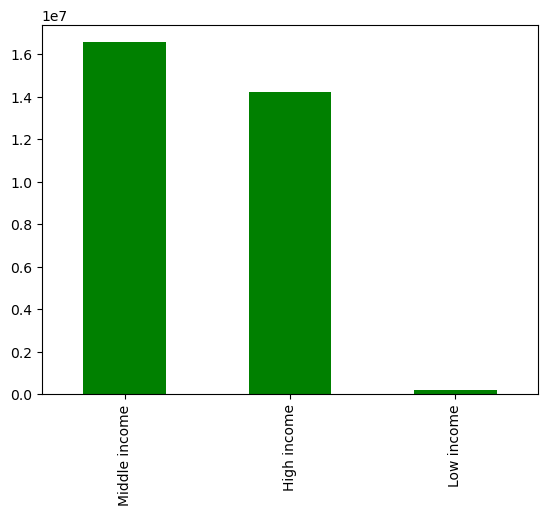

In [49]:
# Create a Bar Chart for Income Profile

br_incm_ctgry = ords_prods_custs_normal['income_flag'].value_counts().plot.bar(color = ['green'])

In [50]:
br_incm_ctgry.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_flag.png'),bbox_inches='tight')

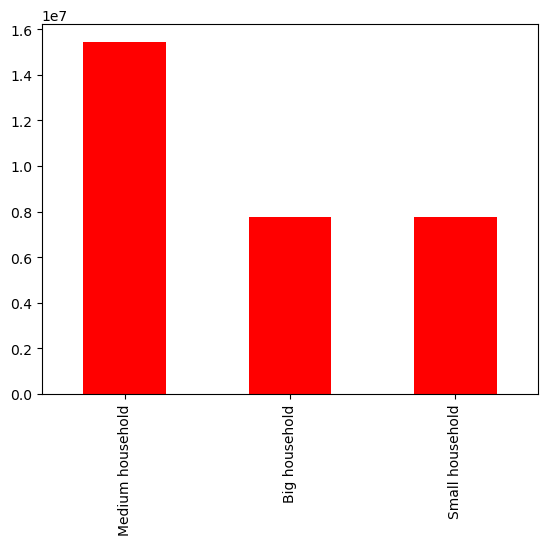

In [51]:
# Create a Bar Chart for Household Status Profile
br_hshld_stts = ords_prods_custs_normal['household_flag'].value_counts().plot.bar(color = ['red'])


In [52]:
br_hshld_stts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_household_flag.png'),bbox_inches='tight')

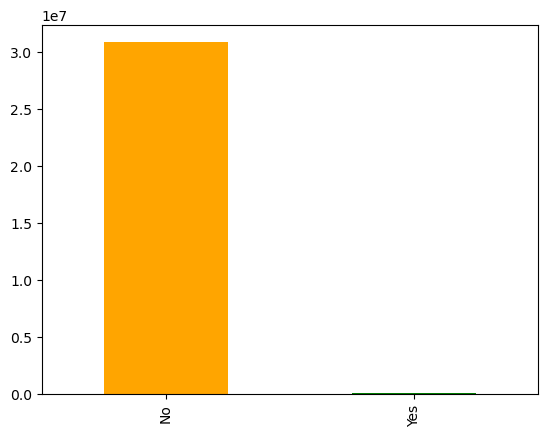

In [53]:
# Create a Bar Chart for Pet Owner Status Profile

br_pt_ownr = ords_prods_custs_normal['pet_owner'].value_counts().plot.bar(color = ['orange', 'green'])

**NOTE:** 99.69% of customers have no pet product purchases, so we might assume they do not own pets.

In [54]:
br_pt_ownr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_owner.png'), bbox_inches='tight')

****
#### 7. AGGREGATE (MEAN, MIN & MAX) OF CUSTOMER PROFILES

**Q7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.**

In [55]:
# Checking the df
ords_prods_custs_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 37 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  price_range_loc                object  
 14  busiest_day                    object  
 15  busiest_days                   object  
 16  busiest_period_of_day          object  
 17  max_order                

#### Age

In [56]:
# Aggregating frequency per age
ords_prods_custs_normal.groupby('age_group_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order            
                                 mean  min    max
age_group_flag                                   
Middle aged                 63.756780  0.0  999.0
Senior                      63.965757  0.0  999.0
Young                       63.766483  0.0  999.0

In [57]:
# Aggregating expenditure per age
ords_prods_custs_normal.groupby('age_group_flag').agg({'prices':['mean', 'min','max']})

prices           
                    mean  min   max
age_group_flag                     
Middle aged     7.790531  1.0  25.0
Senior          7.796144  1.0  25.0
Young           7.784246  1.0  25.0

#### Income

In [58]:
# Aggregating frequency per income
ords_prods_custs_normal.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order            
                                mean  min    max
income_flag                                     
High income                63.367453  0.0  999.0
Low income                 71.577566  0.0  999.0
Middle income              64.131764  0.0  999.0

In [59]:
# Aggregating expenditure per income
ords_prods_custs_normal.groupby('income_flag').agg({'prices':['mean', 'min','max']})

prices           
                   mean  min   max
income_flag                       
High income    7.953438  1.0  25.0
Low income     6.532439  1.0  25.0
Middle income  7.665700  1.0  25.0

#### Household size


In [60]:
# Aggregating frequency per household size
ords_prods_custs_normal.groupby('household_flag').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order            
                                   mean  min    max
household_flag                                     
Big household                 63.587862  0.0  999.0
Medium household              63.985814  0.0  999.0
Small household               63.753147  0.0  999.0

In [61]:
# Aggregating expenditure per household size
ords_prods_custs_normal.groupby('household_flag').agg({'prices':['mean', 'min','max']})

prices           
                      mean  min   max
household_flag                       
Big household     7.792886  1.0  25.0
Medium household  7.789957  1.0  25.0
Small household   7.789550  1.0  25.0

#### Pet Ownership

In [62]:
# Pet Owner Profile Usage Frequency Aggregation
ords_prods_custs_normal.groupby('pet_owner').agg({'days_since_prior_order':['mean', 'min','max']})


days_since_prior_order            
                            mean  min    max
pet_owner                                   
No                     63.817146  0.0  999.0
Yes                    67.351332  0.0  999.0

In [63]:
# Aggregating expenditure per pet ownership
ords_prods_custs_normal.groupby('pet_owner').agg({'prices':['mean', 'min','max']})

prices           
               mean  min   max
pet_owner                     
No         7.790298  1.0  25.0
Yes        7.887489  1.0  15.0

****
#### 8. COMPARISON OF CUSTOMER PROFILES WITH REGIONS AND DEPARTMENTS & VISUALIZATION CHARTS

In [64]:
# Importing departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [65]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [66]:
# Renaming Unnamed:0 column = department_id
dept.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [67]:
# Checking the df
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [68]:
# Turning department dataframe into data dictionary
zipped=zip(dept['department_id'], dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [69]:
# department names = department_id 
ords_prods_custs_normal['department'] = ords_prods_custs_normal['department_id'].map(data_dict)

/var/folders/bx/pgf8ksn96xd_3nc77ydj3_0c0000gp/T/ipykernel_9085/995405604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal['department'] = ords_prods_custs_normal['department_id'].map(data_dict)


In [70]:
ords_prods_custs_normal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,_merge,region,activity_flag,age_group_flag,income_flag,pet_owner,household_flag,department
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,married,40423,both,South,normal_activity_customer,Young,Middle income,No,Big household,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,both,South,normal_activity_customer,Young,Middle income,No,Big household,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,both,South,normal_activity_customer,Young,Middle income,No,Big household,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,both,South,normal_activity_customer,Young,Middle income,No,Big household,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,both,South,normal_activity_customer,Young,Middle income,No,Big household,beverages


#### Age

In [71]:
# We need to create crosstab between age and region flags
age_region =pd.crosstab(ords_prods_custs_normal['age_group_flag'], ords_prods_custs_normal['region'])

In [72]:
age_region

region,Midwest,North East,South,West
age_group_flag,,,,
Middle aged,2886332,2104198,3999499,3123123
Senior,2356770,1809013,3361229,2585595
Young,2018411,1551474,2950411,2218509


In [73]:
# Crosstab between age and department flags
age_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['age_group_flag'])
age_depart

age_group_flag,Middle aged,Senior,Young
department,,,
alcohol,56614,45628,42385
babies,163908,133019,113465
bakery,437780,366017,317031
beverages,1009824,844687,717390
breakfast,261894,217539,191417
bulk,12898,10929,9624
canned goods,395410,329485,287179
dairy eggs,2017712,1687944,1471526
deli,391004,328967,283863


#### Income


In [74]:
# Crosstab between income and region flags
income_region =pd.crosstab(ords_prods_custs_normal['income_flag'], ords_prods_custs_normal['region'])

In [75]:
income_region

region,Midwest,North East,South,West
income_flag,,,,
High income,3400093,2516484,4663571,3626880
Low income,53250,33144,65230,42508
Middle income,3808170,2915057,5582338,4257839


In [76]:
# Crosstab between income and department flags
income_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['income_flag'])
income_depart

income_flag,High income,Low income,Middle income
department,,,
alcohol,69142,1247,74238
babies,196696,1509,212187
bakery,527703,6023,587102
beverages,1126437,23403,1422061
breakfast,297594,4802,368454
bulk,14218,333,18900
canned goods,485226,4206,522642
dairy eggs,2406160,28400,2742622
deli,462089,6505,535240


#### Household size

In [77]:
# Crosstab between household size and region flags
household_region =pd.crosstab(ords_prods_custs_normal['household_flag'], ords_prods_custs_normal['region'])
household_region

region,Midwest,North East,South,West
household_flag,,,,
Big household,1787286,1381233,2585864,2018133
Medium household,3651411,2728970,5143342,3928644
Small household,1822816,1354482,2581933,1980450


In [78]:
# Crosstab between household and department flags
household_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['household_flag'])
household_depart

household_flag,Big household,Medium household,Small household
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


#### Pet Ownership

In [79]:
# Crosstab between pet ownership and region flags
pet_region =pd.crosstab(ords_prods_custs_normal['pet_owner'], ords_prods_custs_normal['region'])
pet_region

region,Midwest,North East,South,West
pet_owner,,,,
No,7240155,5446951,10281230,7903168
Yes,21358,17734,29909,24059


In [80]:
# Crosstab between pet ownership and department flags
pet_depart =pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['pet_owner'])
pet_depart

pet_owner,No,Yes
department,,
alcohol,144627,0
babies,410392,0
bakery,1120828,0
beverages,2571901,0
breakfast,670850,0
bulk,33451,0
canned goods,1012074,0
dairy eggs,5177182,0
deli,1003834,0


****
#### 9. Visualizations of results & Exporting Updated DataFrames


#### Age and region


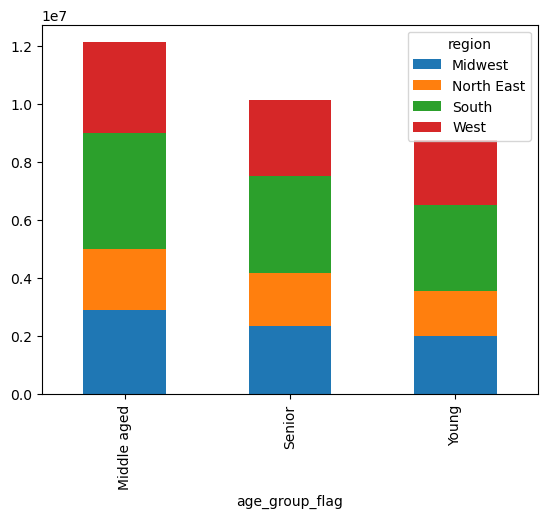

In [81]:
barchart_age_region=age_region.plot(kind= 'bar', stacked = True)

South has the most customers accross regions but the age distribution is similar all throughtout the regions


In [82]:
# Exporting barchart_age_region
barchart_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_age_region.png'),bbox_inches='tight')

#### Age and Department

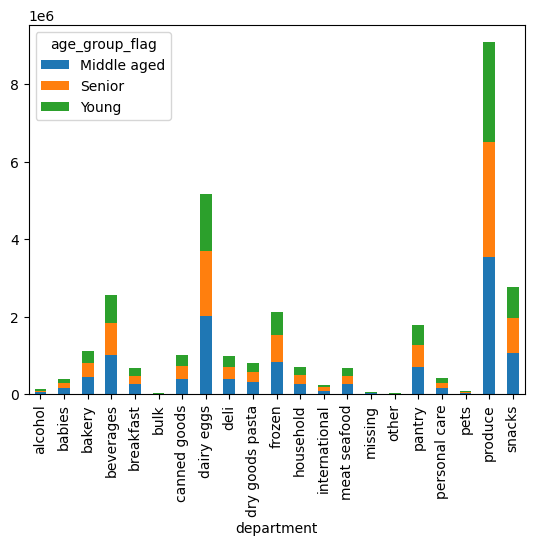

In [83]:
barchart_age_depart=age_depart.plot(kind= 'bar', stacked = True)

Produce has by far the most sales across all categories and age groups, which is followed by dairy-eggs, snacks and beverages

In [84]:
# Exporting barchart_age_dept
barchart_age_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_age_depart.png'),bbox_inches='tight')

#### Income and region

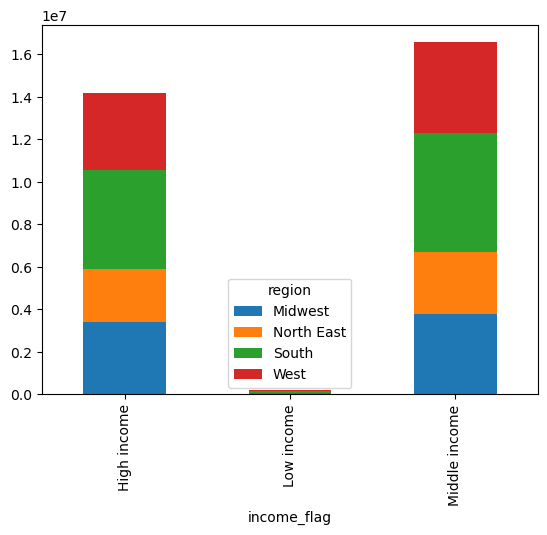

In [85]:
barchart_income_region=income_region.plot(kind= 'bar', stacked = True)

South is the most selling region. People with middle income contribute the most in total sales. 

In [86]:
# Exporting barchart_income_region
barchart_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_income_region.png'),bbox_inches='tight')

#### Income and department

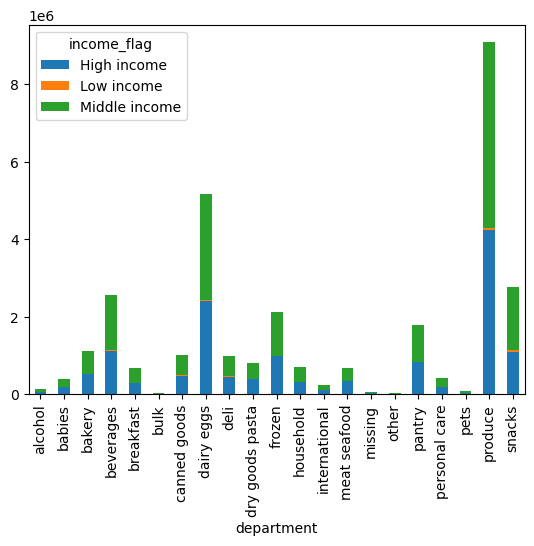

In [87]:
barchart_income_depart=income_depart.plot(kind= 'bar', stacked = True)

People with middle income dominate in most of department categories

In [88]:
# Exporting barchart_income_depart
barchart_income_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_income_depart.png'), bbox_inches='tight')

#### Household and Region


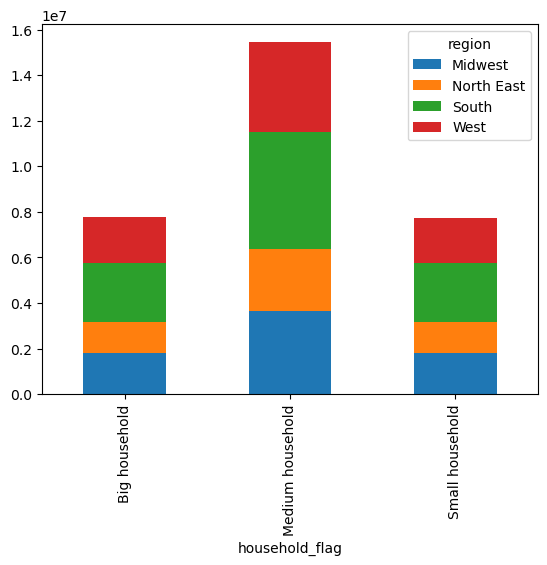

In [89]:
barchart_household_region=household_region.plot(kind= 'bar', stacked = True)

Most of the customers are Medium size households across all regions

In [90]:
# Exporting barchart_income_depart
barchart_household_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_household_region.png'), bbox_inches='tight')

#### Household and Department

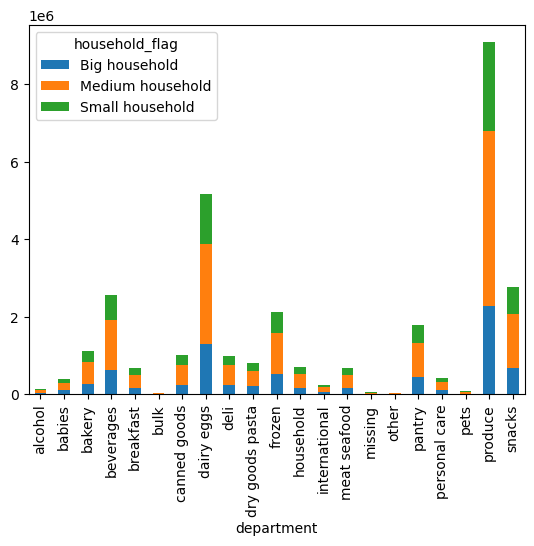

In [91]:
barchart_household_depart=household_depart.plot(kind= 'bar', stacked = True)

In the selling categories, the medium size households also dominate. 

In [92]:
# Exporting barchart_household_depart
barchart_household_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_household_depart.png'),bbox_inches='tight')

#### Pet and Region

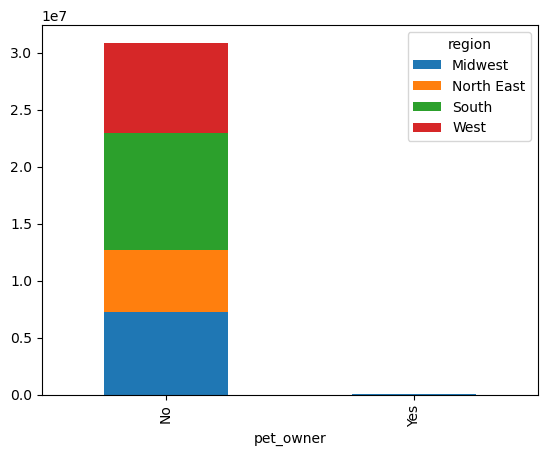

In [93]:
barchart_pet_region=pet_region.plot(kind= 'bar', stacked = True)


In [95]:
# Exporting barchart_pet_region
barchart_pet_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_pet_region.png'), bbox_inches='tight')

#### Pet and Department


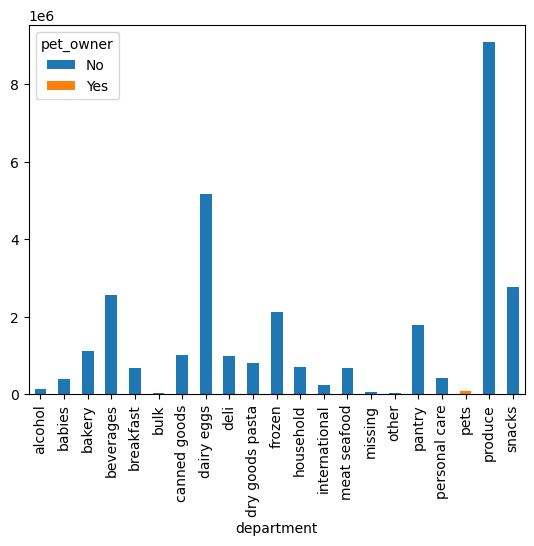

In [96]:
barchart_pet_depart=pet_depart.plot(kind= 'bar', stacked = True)

In [97]:
# Exporting barchart_household_depart
barchart_pet_depart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_pet_depart.png'),bbox_inches='tight')

#### Loyalty Flag

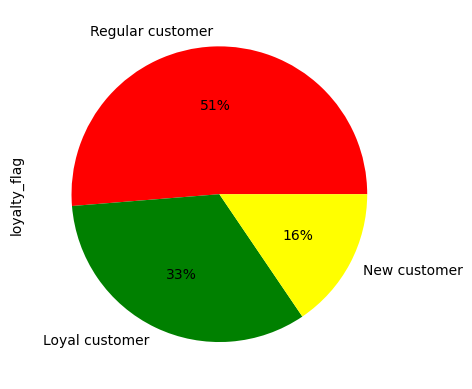

In [98]:
# Creating pie chart 
pie_loyalty = ords_prods_custs_normal['loyalty_flag'].value_counts().plot.pie(autopct=('%1.f%%'), colors=['red','green','yellow'])


In [99]:
# Exporting pie chart
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

##### Loyalty and Order Frequency

In [101]:
# Crosstab between pet loyalty and order frequency
order_frequency_loyalty = pd.crosstab(ords_prods_custs_normal['frequency_flag'], ords_prods_custs_normal['loyalty_flag'])
order_frequency_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,537787,0,26616
Non-frequent customer,6278900,4800340,15387350
Regular customer,3467406,3355,462810


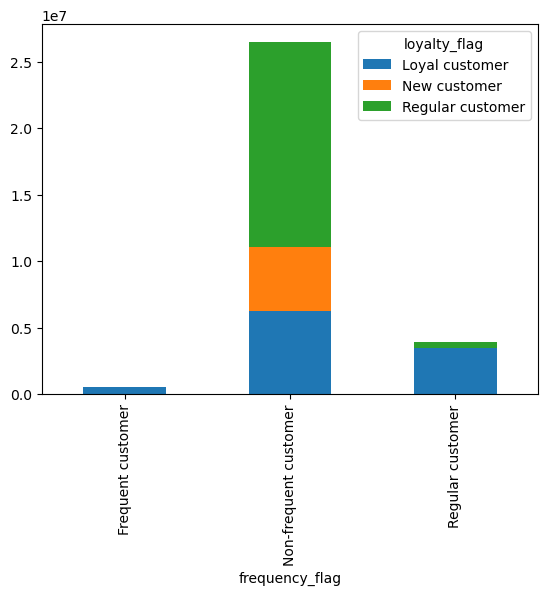

In [102]:
# Creating bar chart for department distribution of Loyalty Customers
barchart_order_frequency_loyalty= order_frequency_loyalty.plot(kind = 'bar', stacked = True)

In [104]:
# Exporting barchart_loyalty_region
barchart_order_frequency_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_loyalty_order_freq.png'), bbox_inches='tight')

#### Price Range per Department

In [106]:
# Crosstab between department and Price Range

department_price_range = pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['price_range_loc'])
department_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


In [108]:
# Copying crosstab to clipboard
department_price_range.to_clipboard()

#### Department Order Frequency

In [109]:
#Department Order Frequency Aggregation
department_order_frequency = ords_prods_custs_normal.groupby('department').agg({'reordered':['mean', 'min','max']})
department_order_frequency

reordered        
                     mean min max
department                       
alcohol          0.590166   0   1
babies           0.591220   0   1
bakery           0.644934   0   1
beverages        0.669548   0   1
breakfast        0.577357   0   1
bulk             0.589788   0   1
canned goods     0.473826   0   1
dairy eggs       0.686309   0   1
deli             0.624485   0   1
dry goods pasta  0.477434   0   1
frozen           0.558728   0   1
household        0.418078   0   1
international    0.382396   0   1
meat seafood     0.585137   0   1
missing          0.409369   0   1
other            0.422510   0   1
pantry           0.359807   0   1
personal care    0.334148   0   1
pets             0.619170   0   1
produce          0.666655   0   1
snacks           0.589307   0   1

In [110]:
# Copying Aggregation to clipboard
department_order_frequency.to_clipboard()

#### Extra

In [119]:
#Order frequency by department and Check Output

department_order = ords_prods_custs_normal['department'].value_counts(dropna = False)

In [121]:
# Copying Order frequency to clipboard

department_order.to_clipboard()

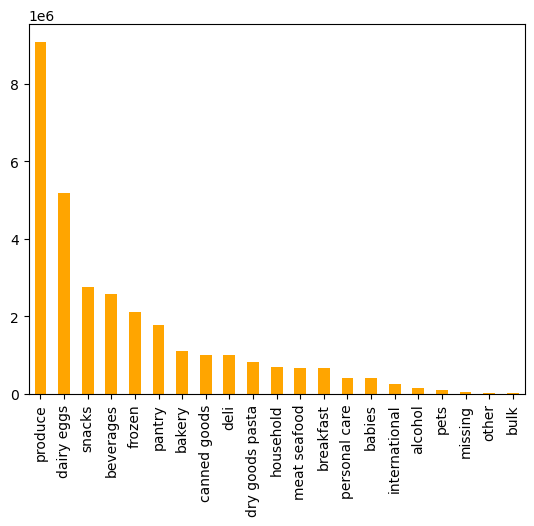

In [120]:
#Create a Bar Chart Order frequency by department

barchart_order_department = ords_prods_custs_normal['department'].value_counts().plot.bar(color = ['orange'])

In [118]:
# Exporting barchart
barchart_order_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','barchart_ord_depart.png'),bbox_inches='tight')

In [122]:
# Loyalty Flag Price Range Check Output
price_loyalty = pd.crosstab(ords_prods_custs_normal['spender_flag'], ords_prods_custs_normal['loyalty_flag'])

price_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
spender_flag,,,
High spender,216600,84011,302814
Low spender,10067493,4719684,15573962


In [123]:
# Copying Loyalty Flag Price Range to clipboard

price_loyalty.to_clipboard()

In [124]:
#department distribution Order Freguency by Region Check Output

dept_dstrbn = pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['region'])

dept_dstrbn

region,Midwest,North East,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [125]:
# Copying Loyalty Flag Price Range to clipboard
dept_dstrbn.to_clipboard()

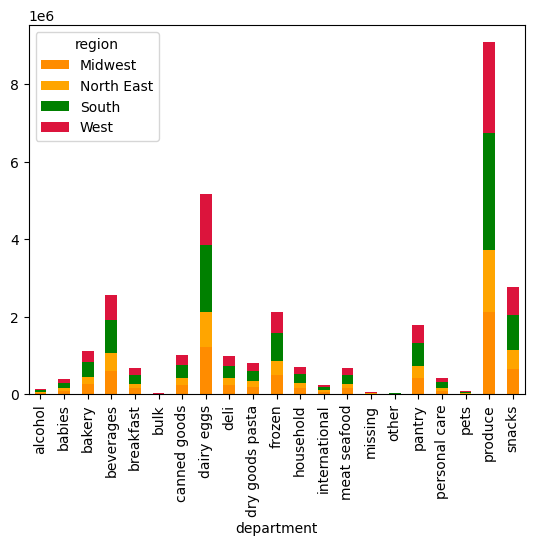

In [131]:
#Create a Bar Chart for department distribution Order Freguency (Day of Week)

barchart_dept_dstrbn = dept_dstrbn.plot(kind = 'bar', stacked = True, color = ['darkorange', 'orange', 'green', 'crimson'])

In [132]:
# Exporting barchart
barchart_dept_dstrbn.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','br_dept_dstrbn.png'),bbox_inches='tight')

In [133]:
#  Exporting the df
ords_prods_custs_normal.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custs_normal.pkl'))